# Kaggle Titanic Competition Data Exploration
## By Tomas Bencomo
This notebook will explore the data from Kaggle's titanic competition. Competitors are tasked with building a predictive model that determines if a passenger surived the sinking of the Titanic in 1912. 

In [75]:
#import libraries
library(dplyr)
library(ggplot2)
library(tidyr)
options(jupyter.plot_mimetypes = 'image/png')

## Import Data
train_edited.csv comes from the original train.csv provided by Kaggle. train_edited.csv has been cleaned. The `Age` column had 177 missing values. To fix this, we calculated the mean age of the train data (mean age = 29.6991176470588) and was used to fill in missing age values. 2 observations contained missing `Embarked` locations and were scrubbed from the data set. The `Cabin` column contained too many missing values and these values were too difficult to infer so we deleted the `Cabin` variable entirely from our data 

In [76]:
#build data frame with train data
#train_edited.csv comes from the original train.csv file provided
data <- read.csv('datasets/train_edited.csv', stringsAsFactor = TRUE)
head(data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,29.69912,0,0,330877,8.4583,Q


## Categorical Variables

In [77]:
str(data)

'data.frame':	889 obs. of  11 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 889 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 558 519 628 416 580 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 680 levels "110152","110413",..: 523 596 669 49 472 275 85 395 344 132 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...


By looking at the output of `str(data)` we can determine that the variables `Name`, `Sex`, `Ticket`, and `Embarked` are categorical variables

### Embarked
We view percent of survivors by their Embarked location

In [78]:
embarked_survival <- data %>% group_by(Embarked) %>% summarize(percent_survived = mean(Survived))
embarked_survival$Embarked <- c("Cherbourg", "Queenstown", "Southampton")
class_count <- as.data.frame(table(select(data, Pclass, Embarked)))
class_count <- spread(class_count, Pclass, Freq)
class_count <- select(class_count, '1', '2', '3')
names(class_count) <- c("Upper", "Middle", "Lower")
embarked_survival <- cbind(embarked_survival, class_count)
head(embarked_survival)

Embarked,percent_survived,Upper,Middle,Lower
Cherbourg,0.5535714,85,17,66
Queenstown,0.3896104,2,3,72
Southampton,0.3369565,127,164,353


Next we plot this data.

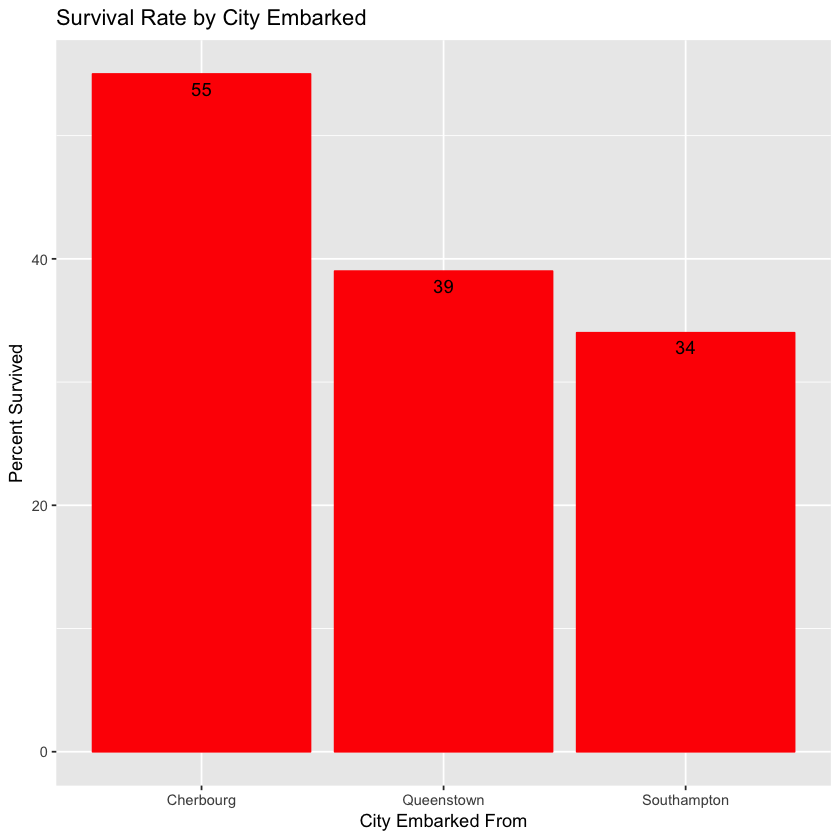

In [79]:
p <- ggplot(embarked_survival, aes(x = Embarked, y = round(percent_survived * 100, digit = 0))) + geom_bar(stat = 'identity', color = 'red', fill = 'red') + labs(x = "City Embarked From", y = "Percent Survived") + ggtitle("Survival Rate by City Embarked") + geom_text(aes(label = round(percent_survived * 100, digits = 0), vjust = 1.6))
p

Passengers who embarked at Cherbourg had an increased chance of survival by about 15%. This could be due to the placement of rooms on the ship in relation to where passengers boarded.

### Sex
The kaggle information states "Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class." Here we explore if women were more likely to survive than men.

In [80]:
sex_df <- data %>% select(Survived, Pclass, Sex)
sex_df <- sex_df %>% group_by(Sex) %>% summarize(count = length(Sex), survivors = sum(Survived), survival_rate = mean(Survived))
sex_df

Sex,count,survivors,survival_rate
female,312,231,0.7403846
male,577,109,0.1889081


75% of women survived while only 19% of men survived. Therefore, women had a much better chance of survival than men.

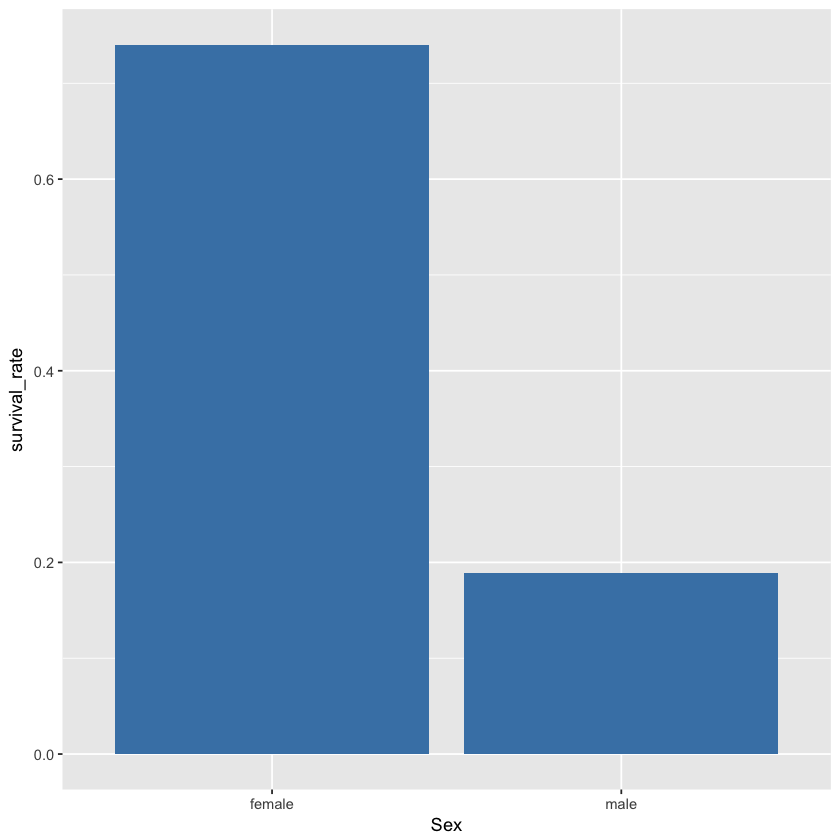

In [81]:
ggplot(sex_df, aes(x = Sex, y = survival_rate)) + geom_bar(stat = 'identity', fill = 'steelblue')

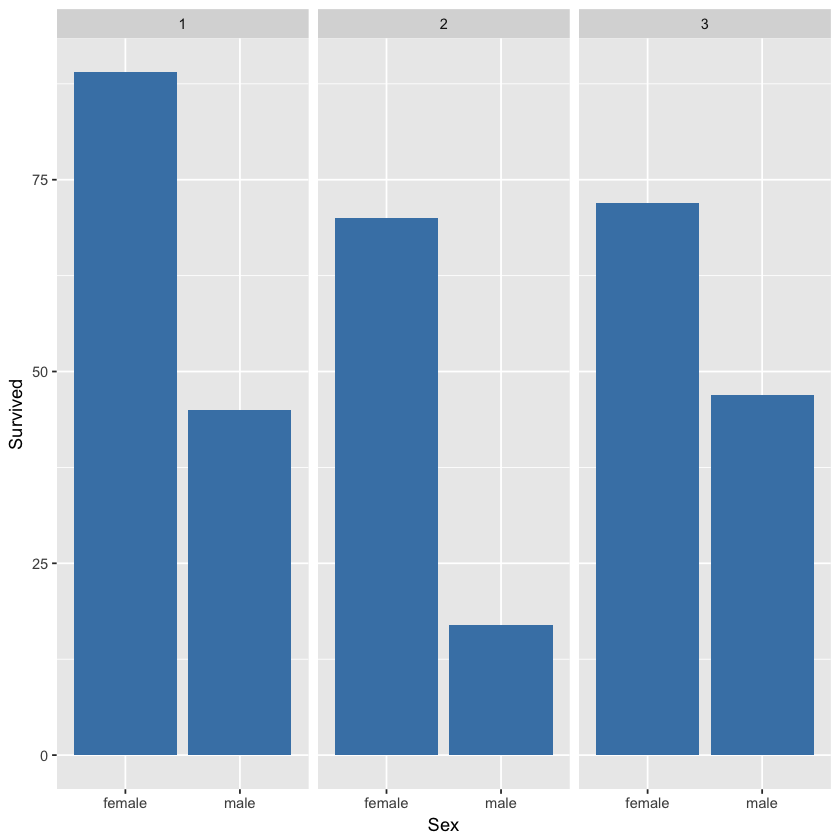

In [82]:
class_sex_data <- data %>% select(Survived, Pclass, Sex)
ggplot(class_sex_data, aes(x = Sex, y = Survived)) + geom_bar(stat = 'identity', fill = 'steelblue') + facet_wrap(~Pclass, ncol = 3)

Overall, women were much more likely to survive no matter their income class. It seems that middle class men were more likely than their peers to die. 